In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('underfitting_dataset.csv')

In [4]:
df.head()


,X,Y
0,-10.000000,107.450712
1,-9.661017,91.261284
2,-9.322034,96.615644
3,-8.983051,103.540650
4,-8.644068,71.207607


# Underfitting

R2 Score for test data: -0.14006350342140927
R2 Score for train data: 8.832432782324151e-05


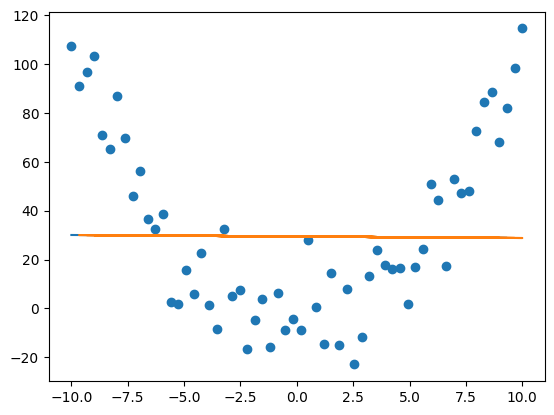

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df[["X"]]   # MUST be 2D
y = df["Y"]

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)


print("R2 Score for test data:", r2_score(y_test, y_pred))
print("R2 Score for train data:", r2_score(y_train, y_pred_train))

plt.scatter(X,y)
plt.plot(x_test ,y_pred)
plt.plot(x_train,y_pred_train)
plt.show()




# Overfitting

Train R2: 0.9713676651794793
Test R2 : 0.8559943476397678


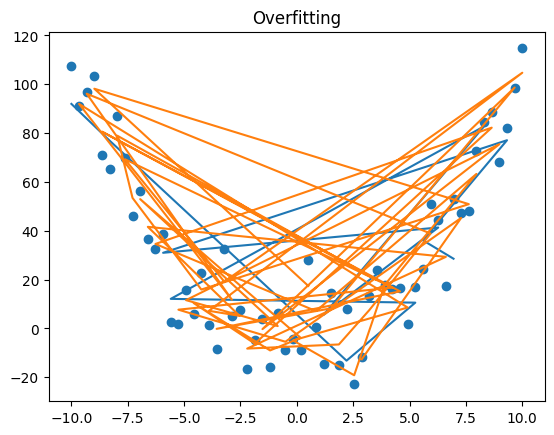

In [6]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    
)

rf.fit(x_train, y_train)

train_pred = rf.predict(x_train)
test_pred = rf.predict(x_test)

print("Train R2:", r2_score(y_train, train_pred))
print("Test R2 :", r2_score(y_test, test_pred))



plt.scatter(X, y)
plt.plot(x_test ,test_pred)
plt.plot(x_train,train_pred)
#plt.plot()
plt.title("Overfitting")
plt.show()

